## Step 1: Crawl a real-world dataset

In this step, we scrape data from the Kaggle dataset containing the Bengaluru Home Prices (Bengaluru is Hi-Tec city in India with many IT companies). This data covers the following major variables: Area type, Availability, Location, Size, Society, Total sqft, bathrooms, balcony and Price. First, we will import necessary libraries such as Kaggle and KaggleApi. Then, we will API call the webpage to find the relevant table.

In [2]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi

In [3]:
api = KaggleApi() # We'll initialize API and then authenticate it.
api.authenticate()

Now we're ready to download datasets and Kaggle API gives several options for doing this like 
downloading competition dataset or standalone dataset. For downloading standalone dataset, we need to 
pass username followed by dataset name. We can find dataset downloaded in the location and output 
as True.

In [5]:
api.dataset_download_file('amitabhajoy/bengaluru-house-price-data', 'Bengaluru_House_Data.csv')

Dataset URL: https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data


False

In [6]:
print(kaggle.api.dataset_list_files('amitabhajoy/bengaluru-house-price-data').files)

[]


## Step 2: Perform data preparation & cleaning

In [8]:
# We'll start Data Cleaning, by importing necessary libraries like pandas, numpy and matplotlib followed by reading our dataset csv file.

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

df_raw = pd.read_csv("Bengaluru_House_Data.csv")
df_raw.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [9]:
# df.shape shows no. of rows & columns in data like 13,320 rows here.

df_raw.shape

(13320, 9)

In [10]:
# Examining area type feature, print count of data sample in each of area type categories.

df_raw.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [11]:
# To keep model very simple, we'll drop certain columns.

df_col = df_raw.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')
df_col.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [12]:
# Data cleaning, removing null values. isnull().sum() gives out total rows where values is NA.

df_col.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
# Since, dataset has 13k rows and NA rows are small in number, we can drop them.

df_null = df_col.dropna()
df_null.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [14]:
df_null.shape

(13246, 5)

## Step 3: Performing Exploratory data analysis

In [144]:
# Exploring different size features of bedrooms, unique() gives out all uniques values.

df_null['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

4 bedroom & 4 BHK are same, so we'll create new column BHK based on size column and apply lamda function, x will contain column
value for each of row & on those value we want to apply some transformation, we'll split this string using space, this gives 2 
tokens, out of which we'll take 1st token finally we need to convert string into integer.

In [18]:
# Ensure we're working with a copy of the DataFrame, if necessary
df_null = df_null.copy()

# Apply the transformation and create the new 'bhk' column.
df_null.loc[:, 'bhk'] = df_null['size'].apply(lambda x: int(x.split(' ')[0]))

In [19]:
df_null.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [20]:
# To find different values of bedrooms.

df_null['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [21]:
# To show homes with more than 20 bedrooms.

df_null[df_null.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [22]:
df_null.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

We can see there are some, not numbers but range like '1133 - 1384', now we will change this range to numbers by taking average.
First, let's find out variation kinds in total sq. ft feature, define a function is_float, try to convert value sq ft column into float
& if not valid value such as range it'll get caught in except block.

In [24]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [25]:
# When we apply is_float function it'll return true, but we want where it is not a valid value (~ negate operation).

df_null[~df_null['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


Takes input range string and if tokens are 2, we convert individual tokens into float numbers & then we take average otherwise if regular 
number we convert into float.

In [27]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None


df_to_num = df_null.copy()
df_to_num['total_sqft'] = df_to_num['total_sqft'].apply(convert_sqft_to_num)
df_to_num.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [28]:
# Testing the function and if it correctly calculates average between the two numbers of input range.

convert_sqft_to_num('2100 - 2850')

2475.0

In [29]:
# Cross-checking if function was correctly applied on index 30 location.

df_to_num.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [30]:
# Feature Engineering

df_per_sqft = df_to_num.copy()
df_per_sqft['price_per_sqft'] = df_per_sqft['price']*100000/df_per_sqft['total_sqft'] # Create price per sq ft column
df_per_sqft.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [31]:
# Exploring location column.

len(df_per_sqft.location.unique())

1304

In [32]:
# Dimensionality curse or problem - having too many columns like here 1304.

# Strip any extra spaces from location
df_per_sqft.location = df_per_sqft.location.apply(lambda x: x.strip())

Grouping by dataframe using location and creating location column from the result on which we'll be performing aggregation function, which will give count per location and sort them according to data points.

In [34]:
location_stats = df_per_sqft.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [35]:
# Finding out how many locations have less than 10 datapoints.

len(location_stats[location_stats<=10])

1052

In [36]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [37]:
len(df_per_sqft.location.unique())

1293

In [38]:
# There are 1052 locations out of 1293 which has < 10 data points, we'll put all these locations into general category "other".

df_per_sqft.location = df_per_sqft.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df_per_sqft.location.unique())

242

## Step 4: Asking question about the data

How do the relationships between number of bedrooms (BHK), size of the apartment (in sqft), price, and price per sqft vary? 

The insinuation is along multiple lines of questioning:



Price Variation by Location:

What is the variation in price per sqft across locations?

Are there locations that deviate outlierly from overall price trends?



Size and Price Correlation:

What is the correlation between the total size of the apartment in sqft and its price, and how does this correlation differ across locations?

Do larger apartments in certain areas with less positive price escalation compare to those in other areas?

Is there any particular threshold after which price growth becomes nonlinear, e.g., apartments sized under 1000 or 2000 sqft versus those greater than 2000 sqft?

In [40]:
# Outlier Detection and Removal

df_per_sqft.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


We have to first look at any data rows where sqft/bedroom is < threshold, we are going to remove all the datasets with rooms < 300 sqft area.

In [42]:
df_per_sqft[df_per_sqft.total_sqft/df_per_sqft.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [43]:
df_per_sqft.shape

(13246, 7)

In [44]:
# We'll remove all the bedrooms with < 300 sqft for that we'll use negate "~".

df_less_300 = df_per_sqft[~(df_per_sqft.total_sqft/df_per_sqft.bhk<300)]
df_less_300.shape

(12502, 7)

In [45]:
# Remove more outliers, check price per sqft either very high or very low.

df_less_300.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Write a function that can remove these extreme cases based on standard deviation.
If our dataset should have normal distribution then most of data pts, 70% of data pts should lie between mean & 1 standard deviation, so we 
are going to filter out anything beyond 1 standard deviation.

Now we will write function which can remove price per sqft outliers per location, now we have to do this per location because 
price would depend upon locations. So, per location we have to find mean and standard deviation & then filter out any data points 
beyond 1 standard deviation.

In [47]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

Taking dataframe as input & grouping by locations first and per location we get subdata frame for which we are calculating 
mean m & standard deviation st and then we are filtering data points beyond standard deviation which means anything above m-st and below m+st 
we'll keep it in reduced df and keep on appending df/location which will give us output df.

Let's all this function on df_less_300, call on df_less_300 we get df_outliers as output & when we run it, we removed price per sqft from df_less_300.

In [49]:
df_outliers = remove_pps_outliers(df_less_300)
df_outliers.shape

(10241, 7)

Another thing we need to check is whether property prices for 3 bedroom apartments are more than 2 bedrooms or not for same sqft area, 
we don't know if there are some special ammenities so we will use a scatter plot to get visualisation.

This function creates 2 different dataframe where for same location you'll have data points for 2 & 3 Bedroom apartments & then we'll plot a 
scatter plot.

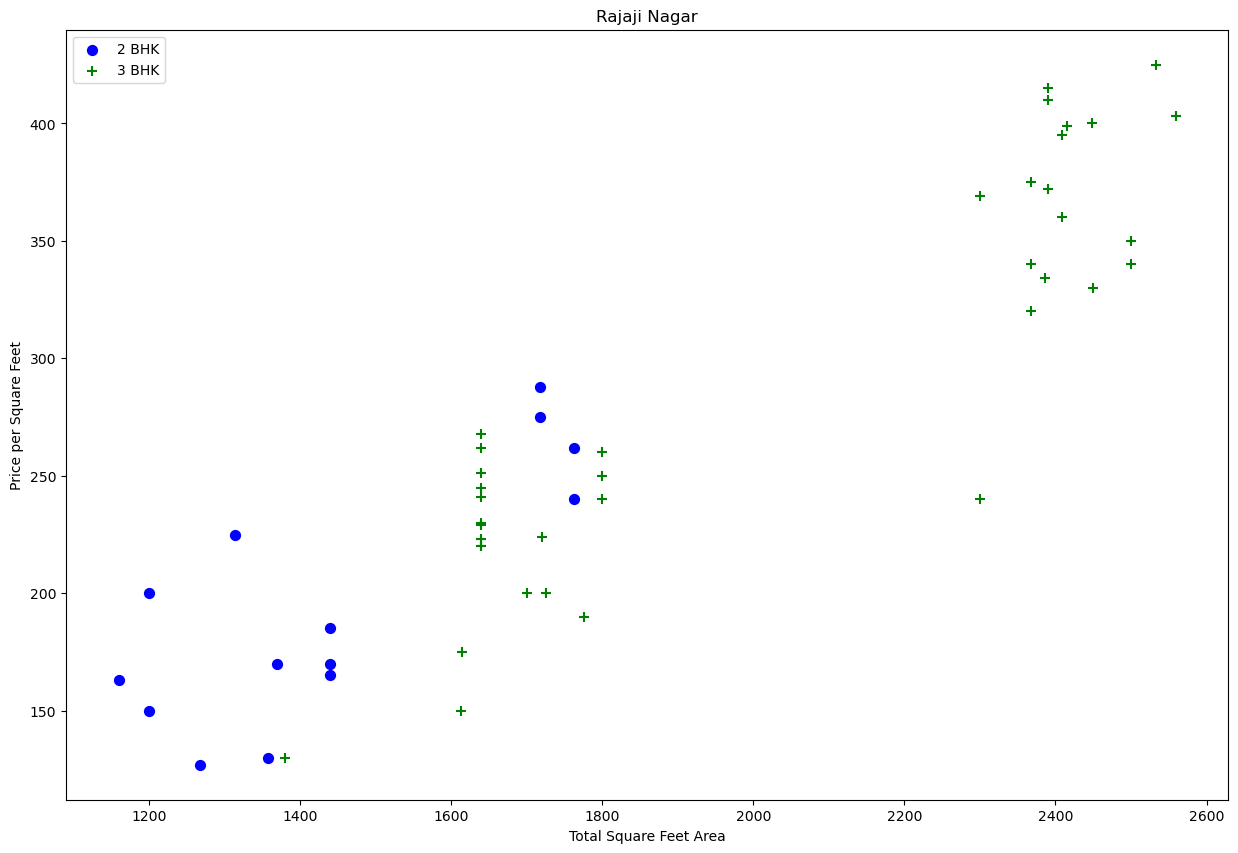

In [51]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price per Square Feet")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df_outliers,"Rajaji Nagar")

Look around 1700 sq ft area 2 Bedroom apartment prices are higher than 3 Bedroom apartment. And remaining 3 BHKs cost around Rs.300-450/sqft for 2300-2500 sqft area. Similarly, for 2 BHK Rs.150-200/sqft for 1200-1500 sqft other than few exceptions.

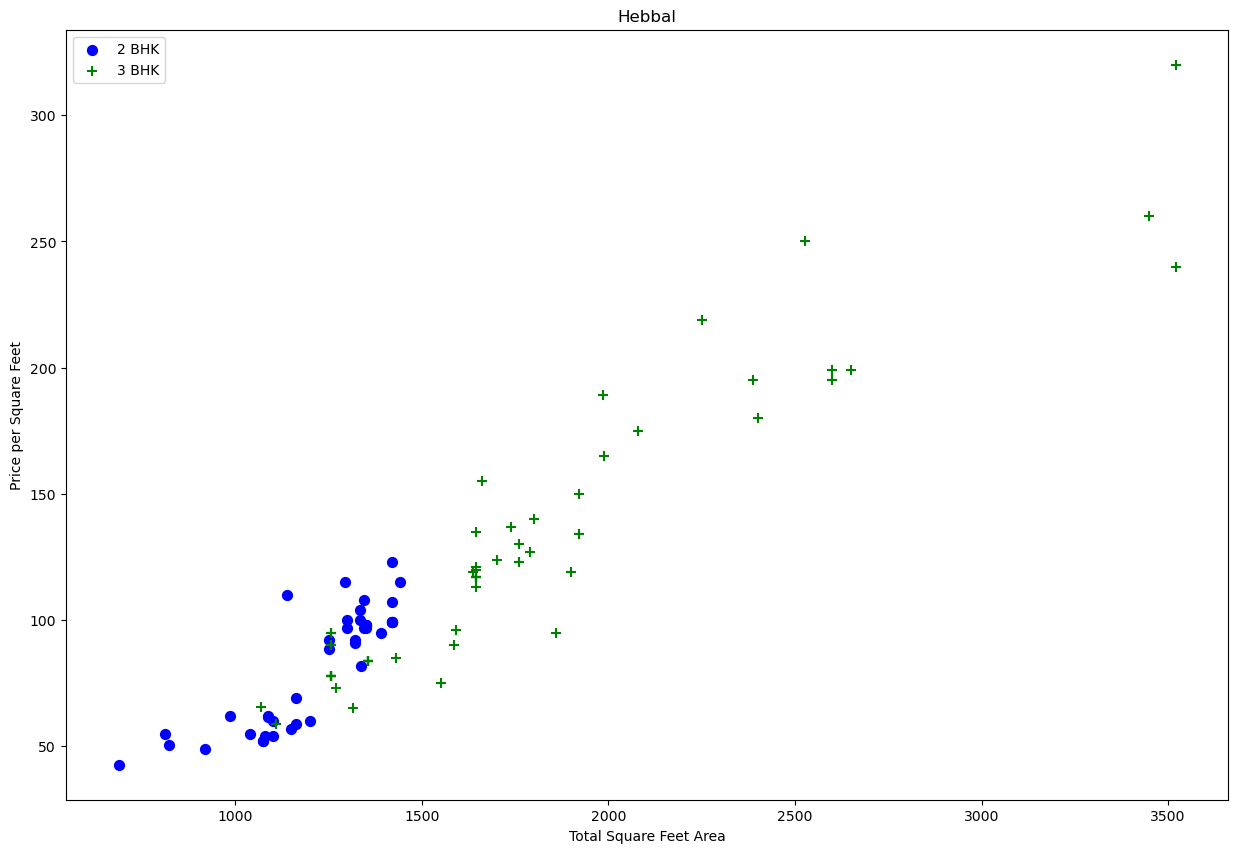

In [53]:
# Checking for Hebbal location.

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price per Square Feet")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df_outliers,"Hebbal")

Function to remove outliers, it'll create per bedroom home and some statistics, kind of statistics like we'll 
create a dictionary like where 1 bedrooms apartment homes for which we'll calculate mean, standard deviation & count.


We should also remove properties where for same locations, the price of 3 bedrooms apartments < 2 bedrooms apartment(with same sqft area).
For given location, we'll build a dictionary of stats per bhk.

In [55]:
{
    '1' : {
        'mean': 4000,
        'std': 2000,
        'count': 34
    },
    
# And we'll filter out all the 2 bedrooms apartments whose value is < mean because we would think that 2 bedrooms apartment home
# for same sqft should have a little higher value than 1 bedrooms.
    '2' : {
        'mean': 4300,
        'std': 2300,
        'count': 22
    },
}

# Now we can remove those 2 BHK apartments whose price/sqft < mean price/sqft of 1 BHK apartment

{'1': {'mean': 4000, 'std': 2000, 'count': 34},
 '2': {'mean': 4300, 'std': 2300, 'count': 22}}

In [56]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'): # First we have grouped by location, going through every location dataframe & for
        bhk_stats = {}                                   # every location dataframe we're again creating new dataframe based on BHK.
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft), # And per BHK dataframe computing mean, standard deviation & count 
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
            
            # And once that for loop is over we'll run the same for loop again trying to exclude those data points whose value 
            # per sqft is less than the mean of prev BHK for eg, for 2 bedrooms apartment we'll filter out all those property values whose 
            # price/sqft < 1 bedroom mean
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df_bhk = remove_bhk_outliers(df_outliers)
df_bhk.shape

(7329, 7)

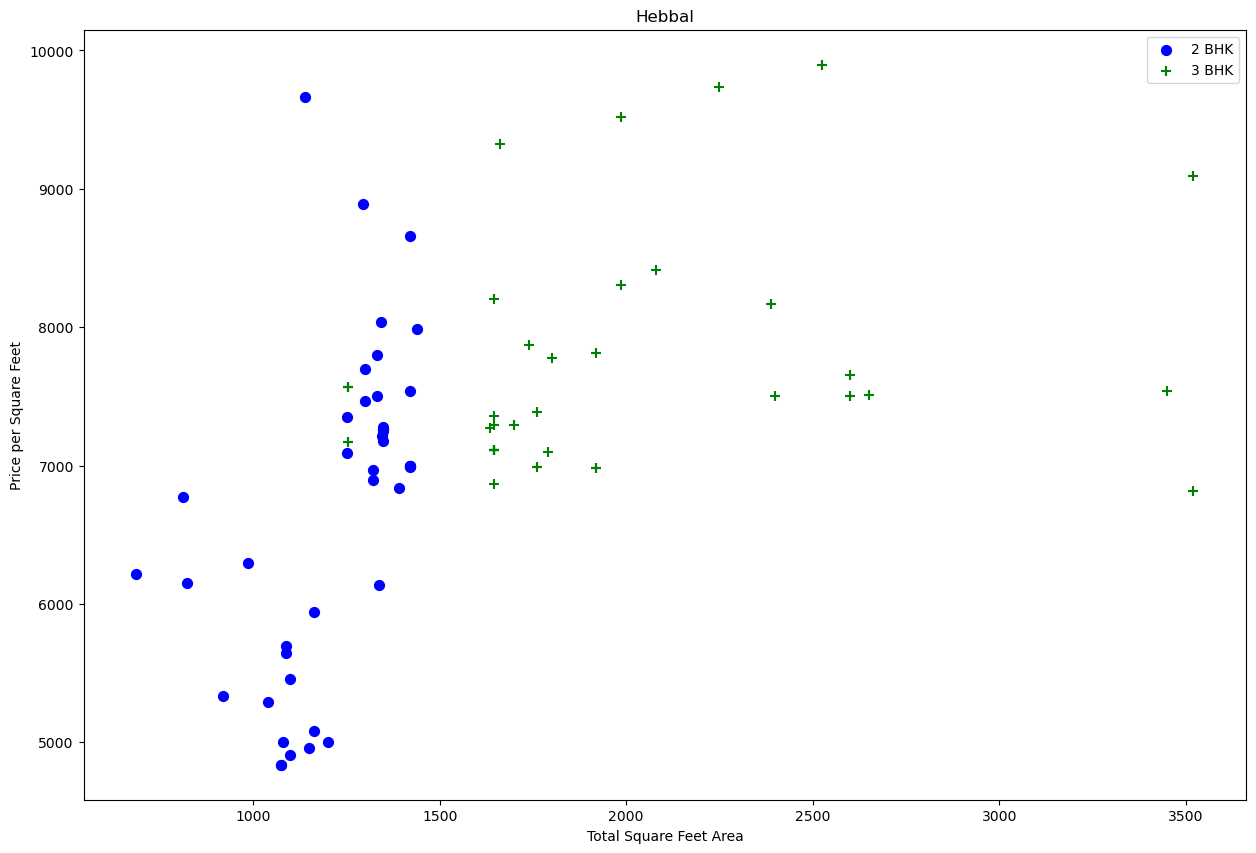

In [57]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price per Square Feet")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df_bhk,"Hebbal")

# We can see many green data pts and bottom left corner have vanished.

We can find points all over the graph, which shows there are houses available at different price points and different square feet area. Obviously, 2 BHK as we can see have less total sqr ft are but interestingly could price equivalent to 3 BHK which maybe the case as the location is in peak area.

Now we'll plot histogram to see how many apartments we have in per sqft area.

X - axis: Price per sqft
Y- axis: Number of datapoints in that category
So, in Rs.0-10,000 /sqft range, we have majority of our data points. This is like normal distribution kind of like Gaussian curve which is like 
a bell curve.

Text(0, 0.5, 'Count')

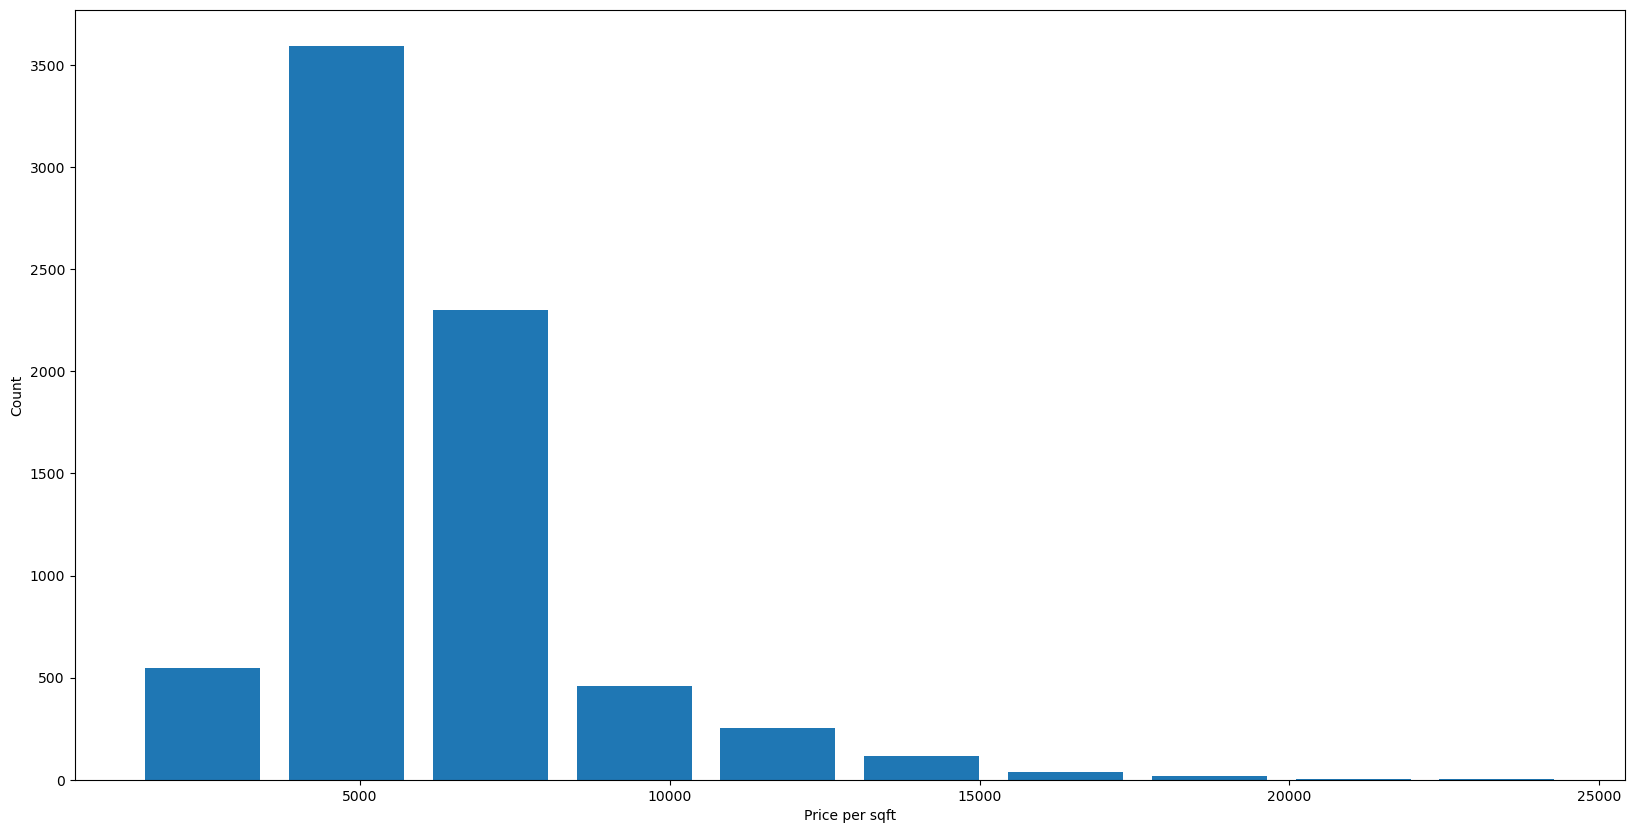

In [59]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df_bhk.price_per_sqft,rwidth=0.8)
plt.xlabel("Price per sqft")
plt.ylabel("Count")

It seems large percentage of houses lie between the price range of Rs. 4,000-8,000 per sqft. it somewhat represents people's ideal preference of price range in general.

In [61]:
df_bhk.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [62]:
df_bhk[df_bhk.bath> 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

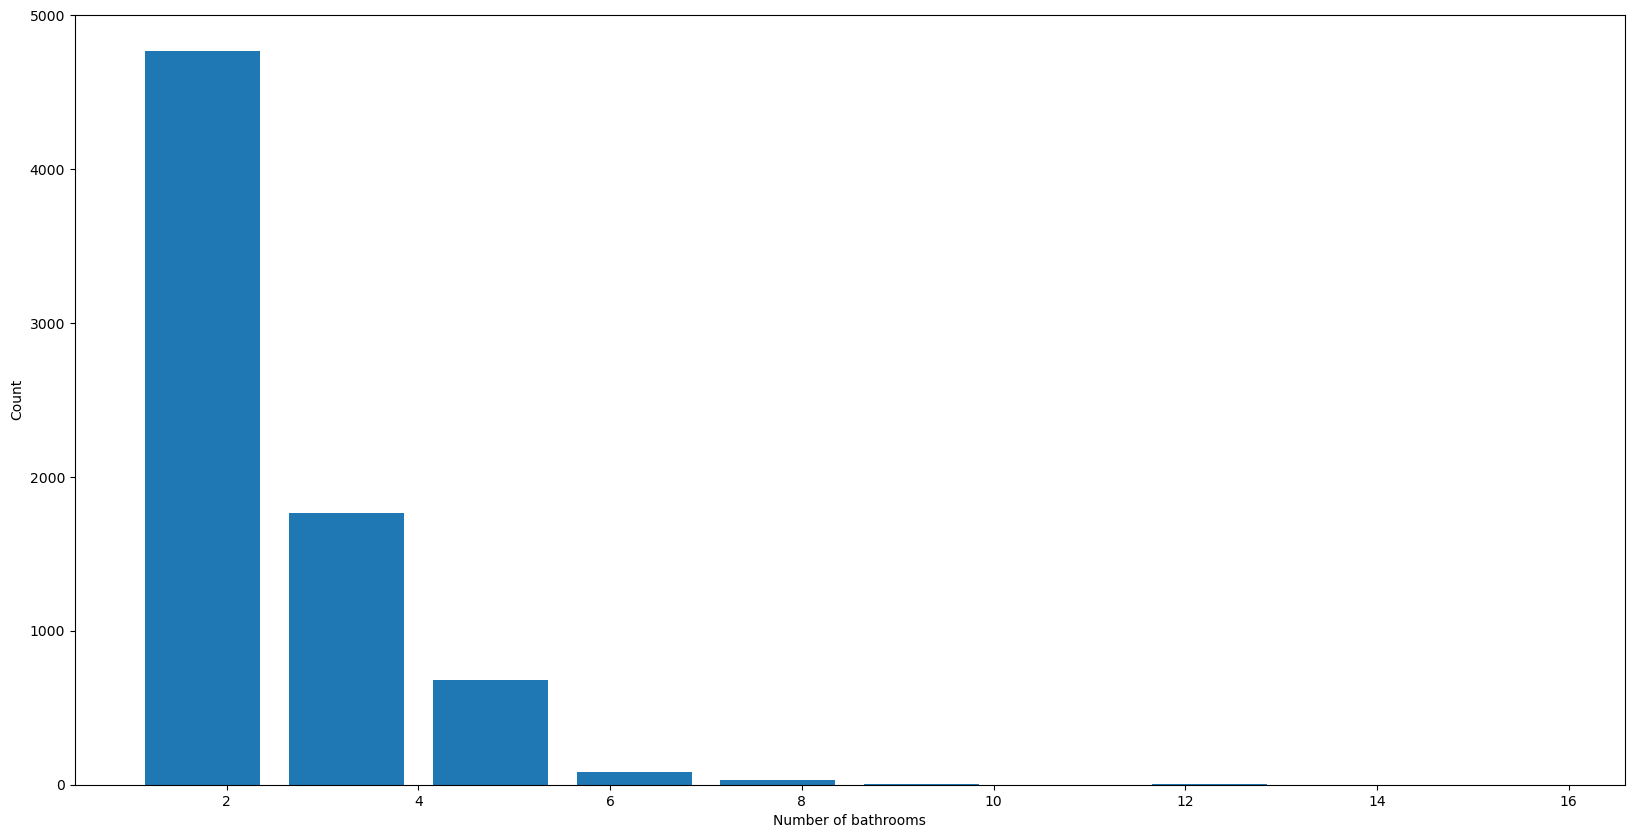

In [63]:
plt.hist(df_bhk.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

It looks like disproportionately most houses have 2 or 3 bathrooms probably because most houses are 2-3 BHK and generally only need 2 or 3 bathrooms it is an optimal count.

In [65]:
# We know anytime we have bathroom more than than no. bedrooms+2 we can mark them as outlier.

df_bedrooms = df_bhk[df_bhk.bath<df_bhk.bhk+2]
df_bedrooms.shape

(7251, 7)

In [66]:
df_new = df_bedrooms.drop(['size','price_per_sqft'],axis='columns')
df_new.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


MODEL BUILDING

We're going to build a Machine Learning model and use K-fold cross-validation and GridSearchCV to come up with the best algorithm as well as best 
parameters. Here, in this dataframe we have a location and we know ML model can't interpret text data in Location column. So, one of the way to 
convert text data to numerical info is to use One Hot Encoding aka dummies.

In [68]:
dummies = pd.get_dummies(df_new.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


We'll concatenate columns we need, to avoid dummy variable trap you should have 1 less dummy column. Let's say if we drop 1st block Jayanagr column 
then to reperesent that column we can use 0's in all other columns and that will mean it's 1st block is Jayanagar so, we're going to drop Other's 
column here.

In [70]:
df_bhk = pd.concat([df_new,dummies.drop('other',axis='columns')],axis='columns')
df_bhk.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [71]:
# We can drop location column as we have already covered that in those dummies columns.

df_bedrooms = df_bhk.drop('location',axis='columns')
df_bedrooms.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [72]:
df_bedrooms.shape

(7251, 245)

In [73]:
# X variable should contain only independent variables. Our dependent variable is price so we will have that dropped.

X = df_bedrooms.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [74]:
y = df_bedrooms.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

We're going to split our dataset into training and test dataset, then we use training set for model training and evaluate model performance we use 
test dataset.

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10) # 20% of samples as test and remaining 80% for model training.

# We've created a Linear Regression model, we are going to call fit method on X train & y train and once the model is trained next is to evaluate score.

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test) # evaluating the score, tells us how good the model is

# When we execute this it will perform training on X_train and y_train and return us with the score.

0.8452277697874322

Now we'll try couple of models with different parameters to come up with best optimal model, we're 1st going to use 
K-fold cross-validation.

In [78]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) #Shuffle split will randomize samples so each of fold have equal 
# distribution of data samples so it's not just targeted into 1 area and when we use cross-validation we're getting these score above 83%.

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

We want to try different algorithm and figure out which one gives us the best score for that, we use GridSearchCV which can run our model 
on different regressors & different parameters and can tell us best score.

In [80]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):  # This function helps us find our best model using grid search CV
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept' : [True, False]     # Not only best algorithm but it'll also tell us best parameter (known as Hyper Parameter Tuning)              
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error','friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) # for cross-validation we'll use CV object with 5 fold cross validation and then 
                                                        # we'll call fit method, then we'll append the scores into this scores list for better result.
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)          # calling fit method
        scores.append({      # apeending scores
            'model': algo_name,
            'best_score': gs.best_score_,     # returns best scores and parmaeters for that particular execution
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.819001,{'fit_intercept': False}
1,lasso,0.687466,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.725065,"{'criterion': 'squared_error', 'splitter': 'be..."


We can see Linear Regression is the winner, it has maximum score and best parameter is Fit intercept False. 
Lasso has 68% and decision tree has 72% accuracy.

## Step 5: Summarise and write a conclusion

The analysis showed that in some cases, a 2 BHK apartment may cost more than that of a 3 BHK apartment for similar square footage, likely due to location and other amenities. Most listings range from about Rs. 4,000 to Rs. 8,000 per square foot, giving a Gaussian-like distribution, while most units have 2-3 bathrooms. A linear regression model was fitted by GridSearchCV, which chose the best algorithms and hyperparameters with prediction of property prices. These insights highlight the key pricing trends and preferences in the housing market.

Now proceeding ahead we can create property price prediction model for different samples using this (similar to Zillow.com in US or MagicBricks in India).